# Project Milestone 

### Step 1a: Planning 
#### Identify the information in the file your program will read


+ Year(1 column):
The year from 1995 to 2010

+ State(1 column):
Includes states, DC, territories in the US, Nationwide (States and DC), and Nationwide (States, DC, and Territories).

+ smoking condition(4 columns):
There are 4 types of smoking conditions: Smoke everyday, Smoke some days, Former smoker, Never smoked. Each precents the percentage in range [0,1] of a certain area in a given year (e.g. 0.2 means in 1995, 20% of people in Arizona smoked everyday)

+ Location 1(1 colomn):
Shows the location, including the name of state/DC/territory and its coordinates on the map. The location 1 is empty for Nationwide (States and DC) and Nationwide (States, DC, and Territories).


### Step 1b: Planning 
#### Write a description of what your program will produce

This project is going to do the first one:produces a line chart showing the trend of percentage of current smokers(including the people who smoke everyday and smoke some days) in the US as year increases.

+ produces a line chart showing the trend of percentage of current smokers(including the people who smoke everyday and smoke some days) in the US as year increases.
+ takes a year and produces the state/DC/territory(excluding Nationwide (States and DC) and Nationwide (States, DC, and Territories)) with the highest current smoker(including the people who smoke everyday and smoke some days) rate in the given year.
+ produces a bar chart showing the percentage of people who have ever smoked (including smoke everyday, smoke some days, and former smoker) for each state/DC/territory(excluding Nationwide (States and DC) and Nationwide (States, DC, and Territories)) in 2010.

### Step 1c: Planning 
#### Write or draw examples of what your program will produce

You must include an image that shows what your chart or plot will look like. You can insert an image using the Insert Image command near the end of the Edit menu.

```python
current_smoker_trend('tobacco.csv')
```
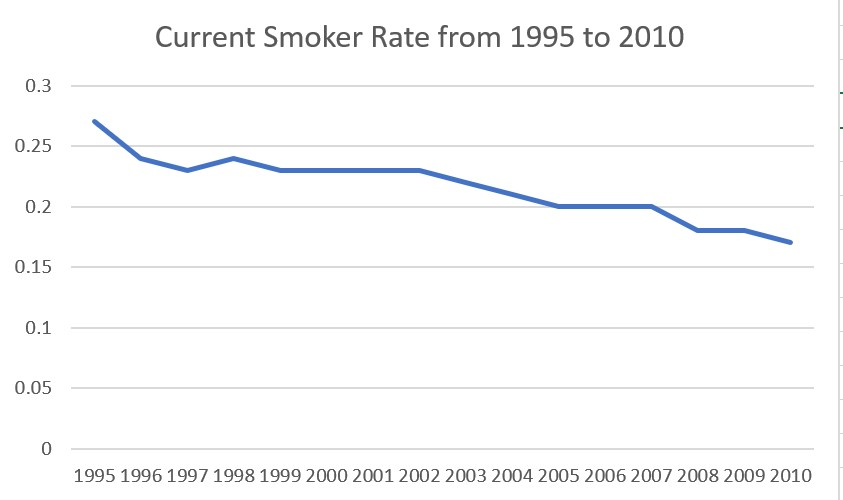

### Step 2a: Building
#### Design data definitions


Before you design data definitions in the code cell below, you must explicitly document here which information in the file you chose to represent and why that information is crucial to the chart or graph that you'll produce when you complete step 2c.

The program will represent the year (in row 0 as an interger), the state (in row 1 as a string), the percentage of people who smoke everyday (in row 2 as a float), and the percentage of people who smoke some day (in row 3 as a float). Year is for producing a graph with respect to the increasing year, State is for filtering out Nationwide (States and DC) and Nationwide (States, DC, and Territories) data and to calculate the average percentage of the US, the percentage of people smoke every day and somedays is to calculate the sum as current smoker rate.

In [2]:
from cs103 import *
from typing import NamedTuple, List
import csv

##################
# Data Definitions

SmokeData = NamedTuple('SmokeData',[('year',int),# in range [1995,2010]
                                   ('state',str),
                                   ('percent_everyday',float),# in range [0,1]
                                   ('percent_some_days',float)])# in range [0,1]                                 

#interp.SmokeData has a year, a state(can be a state/DC/territory in the US), a percentage
#in the interval [0,1] of people who smoke everyday and a percentag in the interval 
#[0,1] of people who smoke some days

SD1=SmokeData(1995,'Alabama',0.22,0.2)
SD2=SmokeData(2002,'Tennessee',0.23,0.05)

@typecheck
#template based on compound
def fn_for_smoke_data(sd:SmokeData)->...:
    return ...(sd.year,
              sd.state,
              sd.percent_everyday,
              sd.percent_some_days)

# List[SmokeData]
# interp. a list of SmokeData

LOSD0=[]
LOSD1=[SD1]
LOSD2=[SD1,SD2]
LOSD3=[SmokeData(1995,'Alabama',0.22,0.2),
       SmokeData(2002,'Tennessee',0.23,0.05),
       SmokeData(1995,'Georgia',0.18,0.02)]
@typecheck
#template based on arbitrary-sized and reference rule
def fn_for_losd(losd: List[SmokeData]) -> ...:
    #description for accumulator
    acc=... #type:...
    for sd in losd:
        acc=...(acc,fn_for_smoke_data(sd))
    return ...(acc)


### Step 2b: Building
#### Design a function to read the information and store it as data in your program

Complete this step in the code cell below. 

In [4]:
###########
# Functions

@typecheck
def read(filename: str) -> List[SmokeData]:
    """    
    reads information from the specified file and returns a list of SmokeData
    """
    #return []  #stub
    # Template from HtDAP
    # losd contains the result so far
    losd = [] # type: List[SmokeData]

    with open(filename) as csvfile:
        
        reader = csv.reader(csvfile)
        next(reader) # skip header line

        for row in reader:
            sd = SmokeData(parse_int(row[0]),row[1],parse_float(row[2]),parse_float(row[3]))
            losd.append(sd)
    
    return losd


# Begin testing
start_testing()

# Examples and tests for read

expect(read('testfile_1row.csv'),[SmokeData(2002,'Alabama',0.19,0.05)])
expect(read('testfile_3rows.csv'),[SmokeData(2009, 'Georgia',0.13,0.05), 
                               SmokeData(2006, 'Indiana',0.19,0.06), 
                               SmokeData(1998,'Louisiana',0.21,0.05)])

# show testing summary
summary()

2 of 2 tests passed
